# Step 1: 데이터 분석 및 준비

이 노트북에서는 PSM과 SWaT 데이터셋에 대한 탐색적 데이터 분석(EDA)을 수행합니다.

## 목차
1. 환경 설정 및 데이터 로드
2. 기본 EDA
3. 시계열 정상성 분석
4. Trend/Seasonal 분해
5. 이상치 분포 분석
6. 결과 요약

## 1. 환경 설정 및 데이터 로드

In [2]:
# 필요한 라이브러리 임포트
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# 프로젝트 루트 경로 설정 (노트북 위치 기준)
# 방법 1: 절대 경로 사용 (가장 확실)
project_root = '/home/sheda7788/project/Anomaly-Detection'

# 방법 2: 노트북 위치 기준 상대 경로 (대안)
# project_root = os.path.dirname(os.getcwd())

if project_root not in sys.path:
    sys.path.insert(0, project_root)

# src 경로도 추가
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

print(f"Project root: {project_root}")
print(f"src path: {src_path}")

Project root: /home/sheda7788/project/Anomaly-Detection
src path: /home/sheda7788/project/Anomaly-Detection/src


In [3]:
# 데이터 모듈 임포트
from data import DataLoader, DataAnalyzer

# 데이터 경로 설정
PSM_PATH = os.path.join(project_root, 'data', 'raw', 'PSM')
SWAT_PATH = os.path.join(project_root, 'data', 'raw', 'SWaT')

print(f"PSM path: {PSM_PATH}")
print(f"SWaT path: {SWAT_PATH}")

# 경로 존재 확인
print(f"\nPSM 경로 존재: {os.path.exists(PSM_PATH)}")
print(f"SWaT 경로 존재: {os.path.exists(SWAT_PATH)}")

PSM path: /home/sheda7788/project/Anomaly-Detection/data/raw/PSM
SWaT path: /home/sheda7788/project/Anomaly-Detection/data/raw/SWaT

PSM 경로 존재: True
SWaT 경로 존재: True


In [4]:
# PSM 데이터 로드
psm_loader = DataLoader('PSM', PSM_PATH)
psm_train = psm_loader.load_train()
psm_test, psm_labels = psm_loader.load_test()

print("=" * 50)
print("PSM 데이터셋 정보")
print("=" * 50)
psm_info = psm_loader.get_info()
for key, value in psm_info.items():
    if key not in ['feature_names', 'statistics', 'column_stats']:
        print(f"{key}: {value}")

PSM 데이터셋 정보
dataset_name: PSM
train_shape: (132481, 25)
test_shape: (87841, 25)
num_features: 25
train_missing: 0
test_missing: 0
anomaly_ratio: 27.755831559294634
anomaly_count: 24381
normal_count: 63460


In [5]:
# SWaT 데이터 로드
swat_loader = DataLoader('SWaT', SWAT_PATH)
swat_train = swat_loader.load_train()
swat_test, swat_labels = swat_loader.load_test()

print("=" * 50)
print("SWaT 데이터셋 정보")
print("=" * 50)
swat_info = swat_loader.get_info()
for key, value in swat_info.items():
    if key not in ['feature_names', 'statistics', 'column_stats']:
        print(f"{key}: {value}")

SWaT 데이터셋 정보
dataset_name: SWaT
train_shape: (395298, 51)
test_shape: (449919, 51)
num_features: 51
train_missing: 0
test_missing: 0
anomaly_ratio: 12.140185233342002
anomaly_count: 54621
normal_count: 395298


## 2. 기본 EDA

In [6]:
# PSM 데이터 기본 통계
print("PSM Train 데이터 기본 통계")
psm_train.describe()

PSM Train 데이터 기본 통계


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
count,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,...,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000,132481.000000
mean,0.835810,0.840205,0.634216,0.575081,0.543438,0.511895,0.549135,0.537709,0.551150,0.545177,...,0.395703,0.552609,0.626023,0.456713,0.659005,0.009992,0.012821,0.264436,0.106294,0.171205
std,0.067326,0.039472,0.102920,0.049675,0.089430,0.077773,0.064060,0.090104,0.078987,0.081033,...,0.040340,0.078733,0.050332,0.100011,0.033860,0.010383,0.015153,0.095679,0.125078,0.070897
min,0.486490,0.525682,0.421484,0.380874,0.065106,0.110161,0.215909,0.077795,0.038693,0.040358,...,0.126150,0.096146,0.459456,0.148545,0.502730,0.000000,0.000000,0.118326,0.000000,0.009217
25%,0.789497,0.820488,0.580170,0.543702,0.471456,0.451409,0.505682,0.470921,0.490759,0.482553,...,0.366614,0.491537,0.585286,0.390731,0.638411,0.001686,0.000000,0.197384,0.017429,0.115207
50%,0.837290,0.843873,0.603304,0.572077,0.548428,0.507756,0.539773,0.529834,0.552285,0.545577,...,0.393919,0.554260,0.613736,0.431665,0.652471,0.006745,0.007117,0.222967,0.047930,0.165899
75%,0.880603,0.866423,0.625805,0.611127,0.604875,0.559671,0.579545,0.588369,0.603548,0.598897,...,0.424146,0.605177,0.659356,0.478437,0.670762,0.015177,0.024911,0.327924,0.165577,0.221198
max,1.000000,0.909956,1.000000,0.676682,0.929442,0.877493,1.000000,0.968278,0.935128,0.915990,...,1.000000,0.934433,0.919789,1.000000,1.000000,1.000000,0.270463,1.000000,1.000000,1.000000


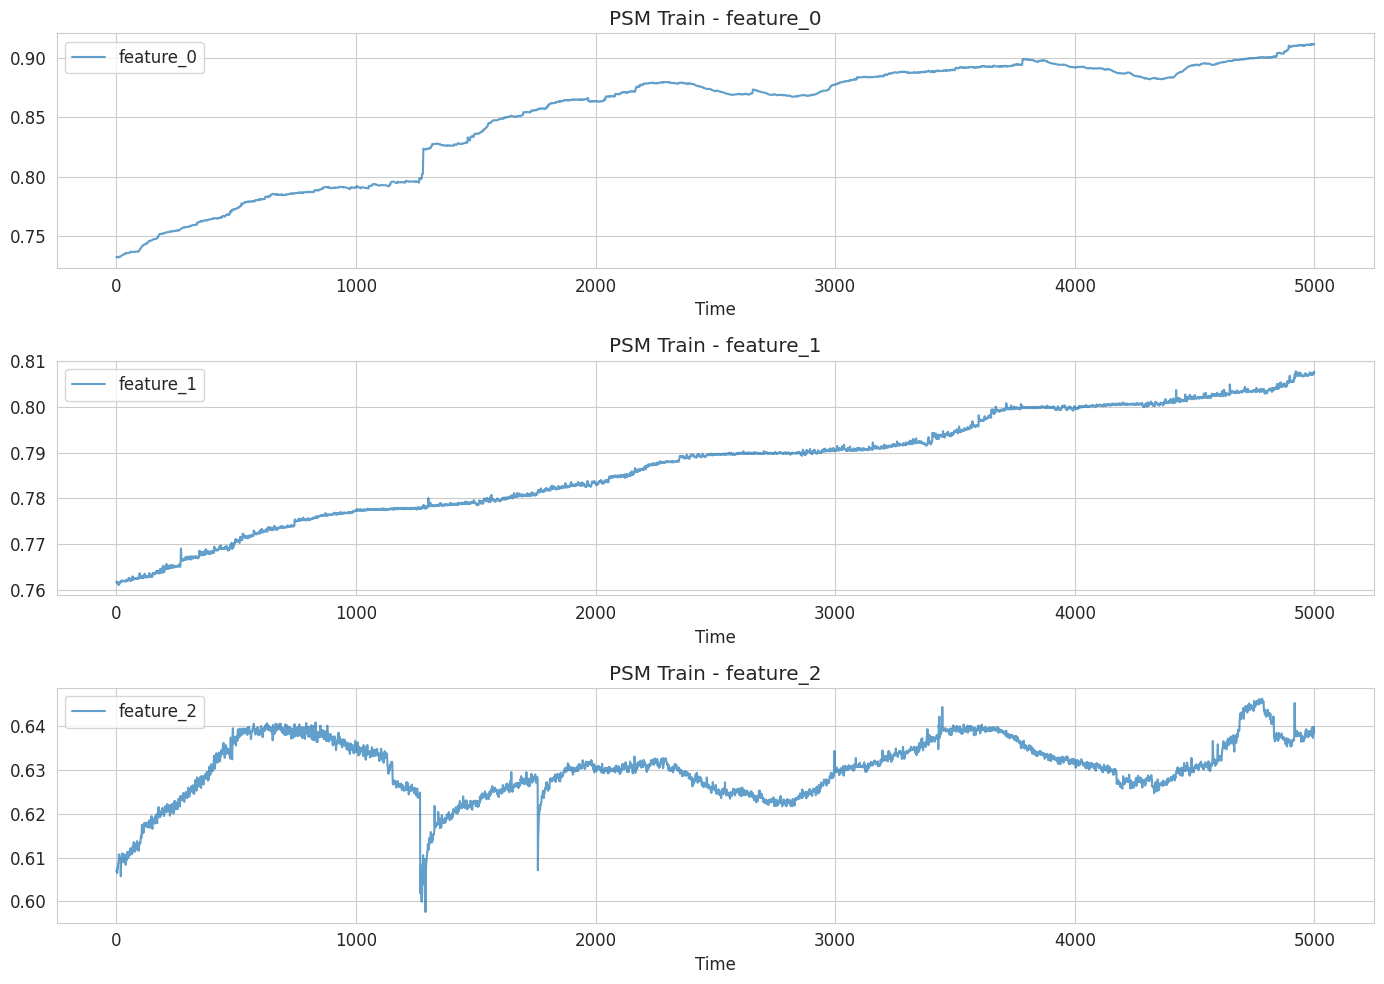

In [7]:
# PSM 시계열 시각화 (일부 변수)
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# 처음 3개 feature 시각화
for i, col in enumerate(psm_train.columns[:3]):
    axes[i].plot(psm_train[col].values[:5000], label=col, alpha=0.7)
    axes[i].set_title(f'PSM Train - {col}')
    axes[i].set_xlabel('Time')
    axes[i].legend()

plt.tight_layout()
plt.show()

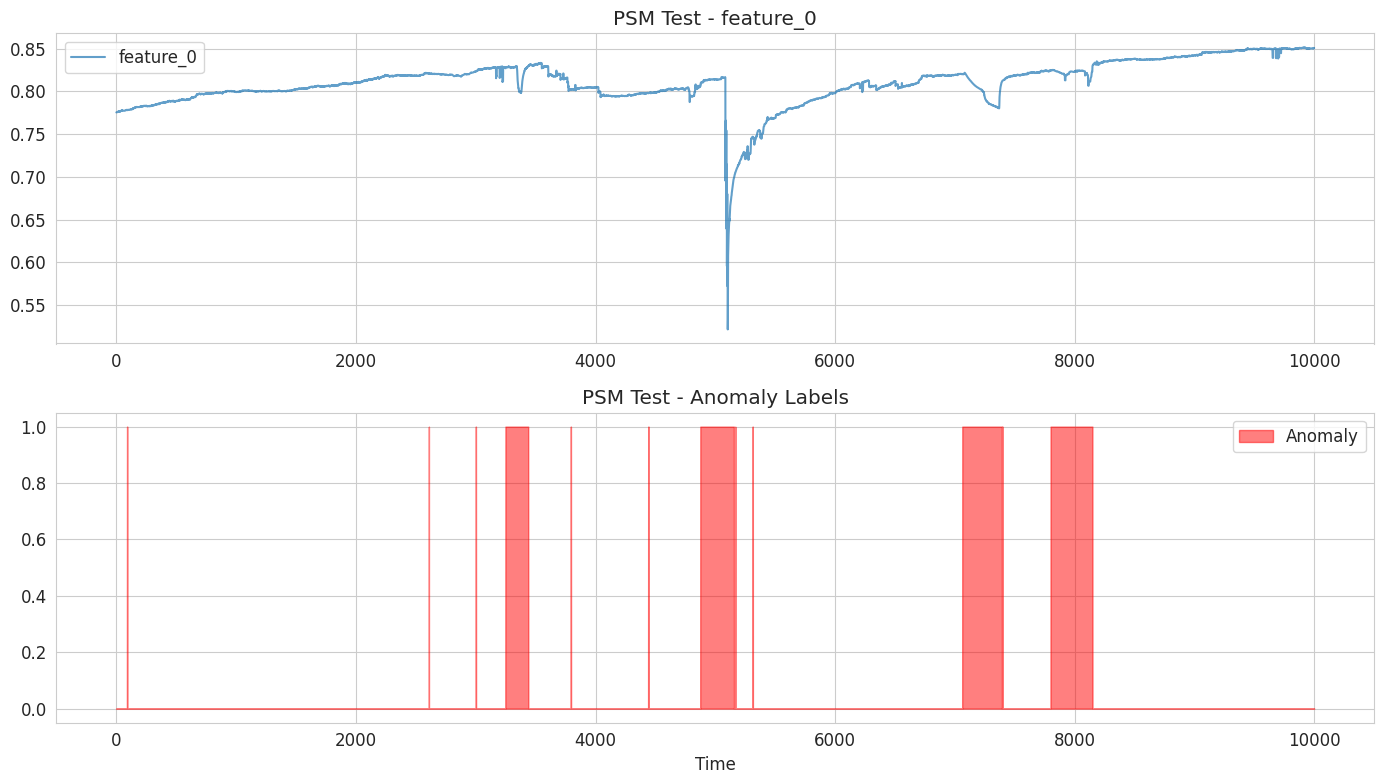

In [8]:
# PSM 테스트 데이터와 라벨 시각화
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# 첫 번째 feature와 이상치 라벨
col = psm_test.columns[0]
axes[0].plot(psm_test[col].values[:10000], label=col, alpha=0.7)
axes[0].set_title(f'PSM Test - {col}')
axes[0].legend()

# 이상치 라벨
axes[1].fill_between(range(10000), psm_labels[:10000], alpha=0.5, color='red', label='Anomaly')
axes[1].set_title('PSM Test - Anomaly Labels')
axes[1].set_xlabel('Time')
axes[1].legend()

plt.tight_layout()
plt.show()

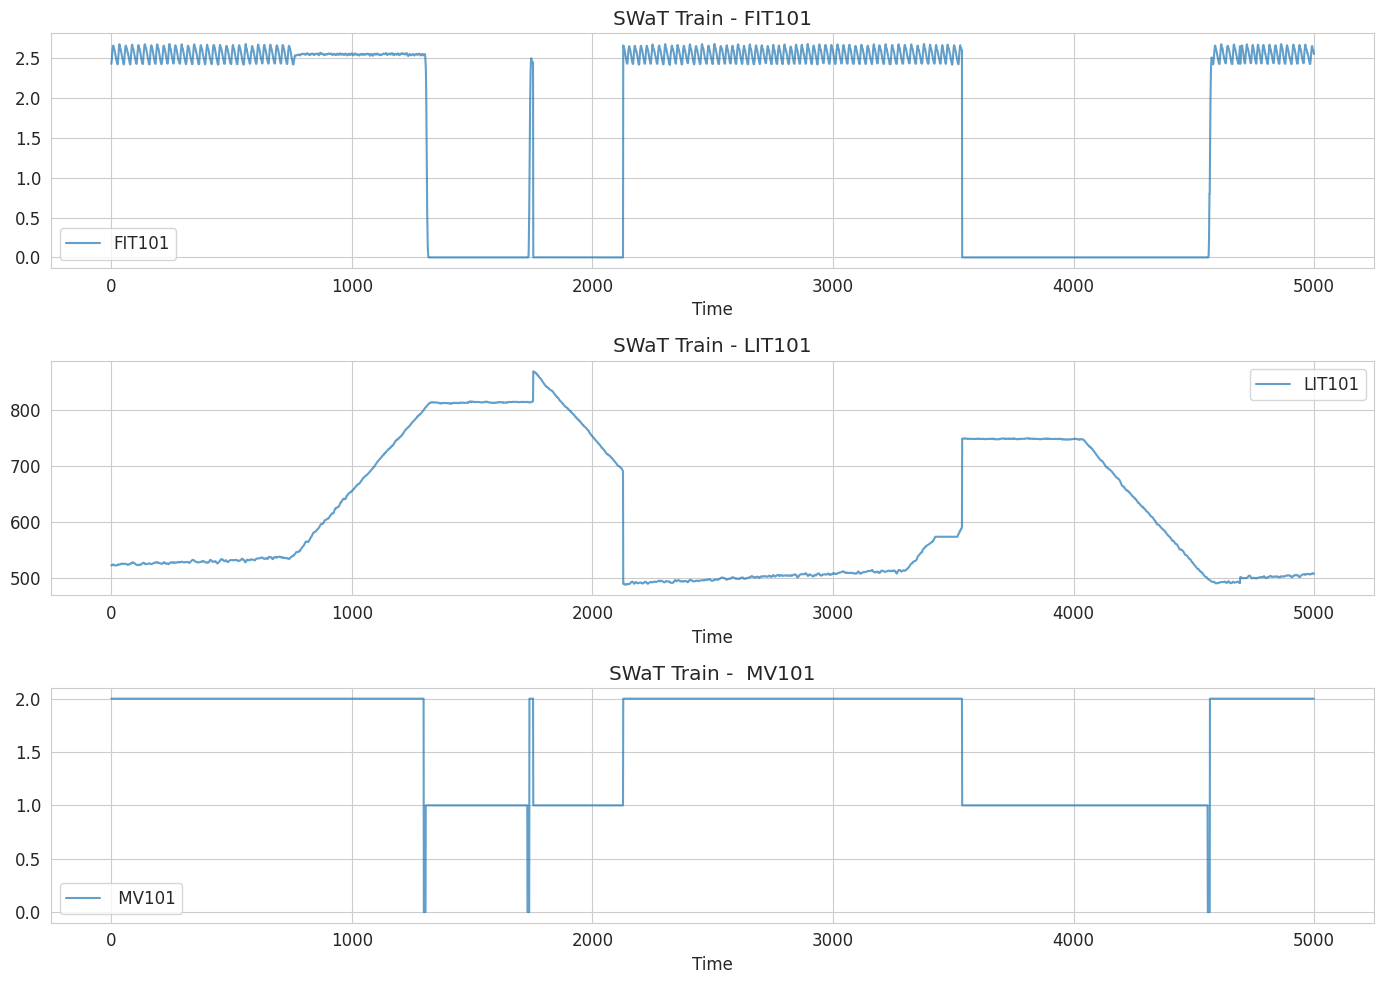

In [9]:
# SWaT 시계열 시각화
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for i, col in enumerate(swat_train.columns[:3]):
    axes[i].plot(swat_train[col].values[:5000], label=col, alpha=0.7)
    axes[i].set_title(f'SWaT Train - {col}')
    axes[i].set_xlabel('Time')
    axes[i].legend()

plt.tight_layout()
plt.show()

## 3. 시계열 정상성 분석 🎓

**학습 포인트**: ADF와 KPSS 검정의 차이를 이해하세요.

- **ADF (Augmented Dickey-Fuller) 검정**
  - 귀무가설: 단위근이 존재한다 (비정상)
  - p-value < 0.05 → 귀무가설 기각 → 정상 시계열

- **KPSS (Kwiatkowski-Phillips-Schmidt-Shin) 검정**
  - 귀무가설: 시계열이 정상이다
  - p-value < 0.05 → 귀무가설 기각 → 비정상 시계열

두 검정의 결과가 일치할 때 신뢰도가 높습니다.

In [10]:
# PSM 데이터 정상성 검정
psm_analyzer = DataAnalyzer(psm_train)

# 모든 변수에 대해 정상성 검정 수행
print("=" * 60)
print("PSM 데이터 정상성 검정 결과")
print("=" * 60)

stationarity_results = []
for col in psm_train.columns:
    result = psm_analyzer.stationarity_test(col)
    stationarity_results.append(result)

# 요약 테이블 출력
print(f"\n{'Feature':<15} {'ADF stat':>10} {'ADF p':>10} {'ADF':>8} {'KPSS stat':>10} {'KPSS p':>10} {'KPSS':>8} {'결론':>12}")
print("-" * 95)

for r in stationarity_results:
    adf_result = "정상" if r['is_stationary_adf'] else "비정상"
    kpss_result = "정상" if r['is_stationary_kpss'] else "비정상"
    print(f"{r['column']:<15} {r['adf_statistic']:>10.4f} {r['adf_pvalue']:>10.4f} {adf_result:>8} "
          f"{r['kpss_statistic']:>10.4f} {r['kpss_pvalue']:>10.4f} {kpss_result:>8} {r['conclusion']:>12}")

# 통계 요약
n_stationary_adf = sum(1 for r in stationarity_results if r['is_stationary_adf'])
n_stationary_kpss = sum(1 for r in stationarity_results if r['is_stationary_kpss'])
n_stationary_both = sum(1 for r in stationarity_results if r['conclusion'] == 'Stationary')
n_total = len(stationarity_results)

print(f"\n[PSM 정상성 검정 요약]")
print(f"  ADF 기준 정상: {n_stationary_adf}/{n_total} ({n_stationary_adf/n_total*100:.1f}%)")
print(f"  KPSS 기준 정상: {n_stationary_kpss}/{n_total} ({n_stationary_kpss/n_total*100:.1f}%)")
print(f"  두 검정 모두 정상: {n_stationary_both}/{n_total} ({n_stationary_both/n_total*100:.1f}%)")

PSM 데이터 정상성 검정 결과


/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outsid


Feature           ADF stat      ADF p      ADF  KPSS stat     KPSS p     KPSS           결론
-----------------------------------------------------------------------------------------------
feature_0          -6.8260     0.0000       정상     2.6504     0.0100      비정상 Non-stationary
feature_1          -5.4302     0.0000       정상    14.6990     0.0100      비정상 Non-stationary
feature_2          -3.3563     0.0125       정상    12.7128     0.0100      비정상 Non-stationary
feature_3          -4.0973     0.0010       정상    28.8628     0.0100      비정상 Non-stationary
feature_4         -11.5263     0.0000       정상     6.8426     0.0100      비정상 Non-stationary
feature_5         -11.1058     0.0000       정상     8.8714     0.0100      비정상 Non-stationary
feature_6          -9.6574     0.0000       정상    11.6573     0.0100      비정상 Non-stationary
feature_7         -10.2695     0.0000       정상    16.5095     0.0100      비정상 Non-stationary
feature_8         -13.0709     0.0000       정상     5.3790     0.0100

/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


In [12]:
# SWaT 데이터 정상성 검정
swat_analyzer = DataAnalyzer(swat_train)

# 모든 변수에 대해 정상성 검정 수행
print("=" * 60)
print("SWaT 데이터 정상성 검정 결과")
print("=" * 60)

swat_stationarity_results = []
for col in swat_train.columns:
    result = swat_analyzer.stationarity_test(col)
    swat_stationarity_results.append(result)

# 요약 테이블 출력 (처음 10개만 표시)
print(f"\n{'Feature':<20} {'ADF stat':>10} {'ADF p':>10} {'ADF':>8} {'KPSS stat':>10} {'KPSS p':>10} {'KPSS':>8} {'결론':>12}")
print("-" * 100)

for r in swat_stationarity_results[:10]:
    adf_result = "정상" if r['is_stationary_adf'] else "비정상"
    kpss_result = "정상" if r['is_stationary_kpss'] else "비정상"
    print(f"{r['column']:<20} {r['adf_statistic']:>10.4f} {r['adf_pvalue']:>10.4f} {adf_result:>8} "
          f"{r['kpss_statistic']:>10.4f} {r['kpss_pvalue']:>10.4f} {kpss_result:>8} {r['conclusion']:>12}")

if len(swat_stationarity_results) > 10:
    print(f"... (총 {len(swat_stationarity_results)}개 중 10개만 표시)")

# 통계 요약
swat_n_stationary_adf = sum(1 for r in swat_stationarity_results if r['is_stationary_adf'])
swat_n_stationary_kpss = sum(1 for r in swat_stationarity_results if r['is_stationary_kpss'])
swat_n_stationary_both = sum(1 for r in swat_stationarity_results if r['conclusion'] == 'Stationary')
swat_n_total = len(swat_stationarity_results)

print(f"\n[SWaT 정상성 검정 요약]")
print(f"  ADF 기준 정상: {swat_n_stationary_adf}/{swat_n_total} ({swat_n_stationary_adf/swat_n_total*100:.1f}%)")
print(f"  KPSS 기준 정상: {swat_n_stationary_kpss}/{swat_n_total} ({swat_n_stationary_kpss/swat_n_total*100:.1f}%)")
print(f"  두 검정 모두 정상: {swat_n_stationary_both}/{swat_n_total} ({swat_n_stationary_both/swat_n_total*100:.1f}%)")

SWaT 데이터 정상성 검정 결과


/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outsid


Feature                ADF stat      ADF p      ADF  KPSS stat     KPSS p     KPSS           결론
----------------------------------------------------------------------------------------------------
FIT101                 -17.0632     0.0000       정상     0.0212     0.1000       정상   Stationary
LIT101                 -14.2085     0.0000       정상     0.1246     0.1000       정상   Stationary
 MV101                 -17.7726     0.0000       정상     0.0293     0.1000       정상   Stationary
P101                   -18.5218     0.0000       정상     0.0122     0.1000       정상   Stationary
P102                   -57.4695     0.0000       정상     0.0527     0.1000       정상   Stationary
 AIT201                 -1.1198     0.7071      비정상   107.4021     0.0100      비정상 Non-stationary
AIT202                  -6.4625     0.0000       정상    98.0047     0.0100      비정상 Non-stationary
AIT203                  -7.4441     0.0000       정상    76.2172     0.0100      비정상 Non-stationary
FIT201                 -18.5

/home/sheda7788/project/Anomaly-Detection/src/data/analyzer.py:118: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


## 4. Trend/Seasonal 분해 🎓

**학습 포인트**: STL 분해의 각 성분을 이해하세요.

- **Trend**: 장기적인 추세 (DLinear가 학습하는 주요 대상)
- **Seasonal**: 주기적인 패턴 (DLinear가 학습하는 또 다른 대상)
- **Residual**: 나머지 성분 (이상치가 여기에 포함됨)

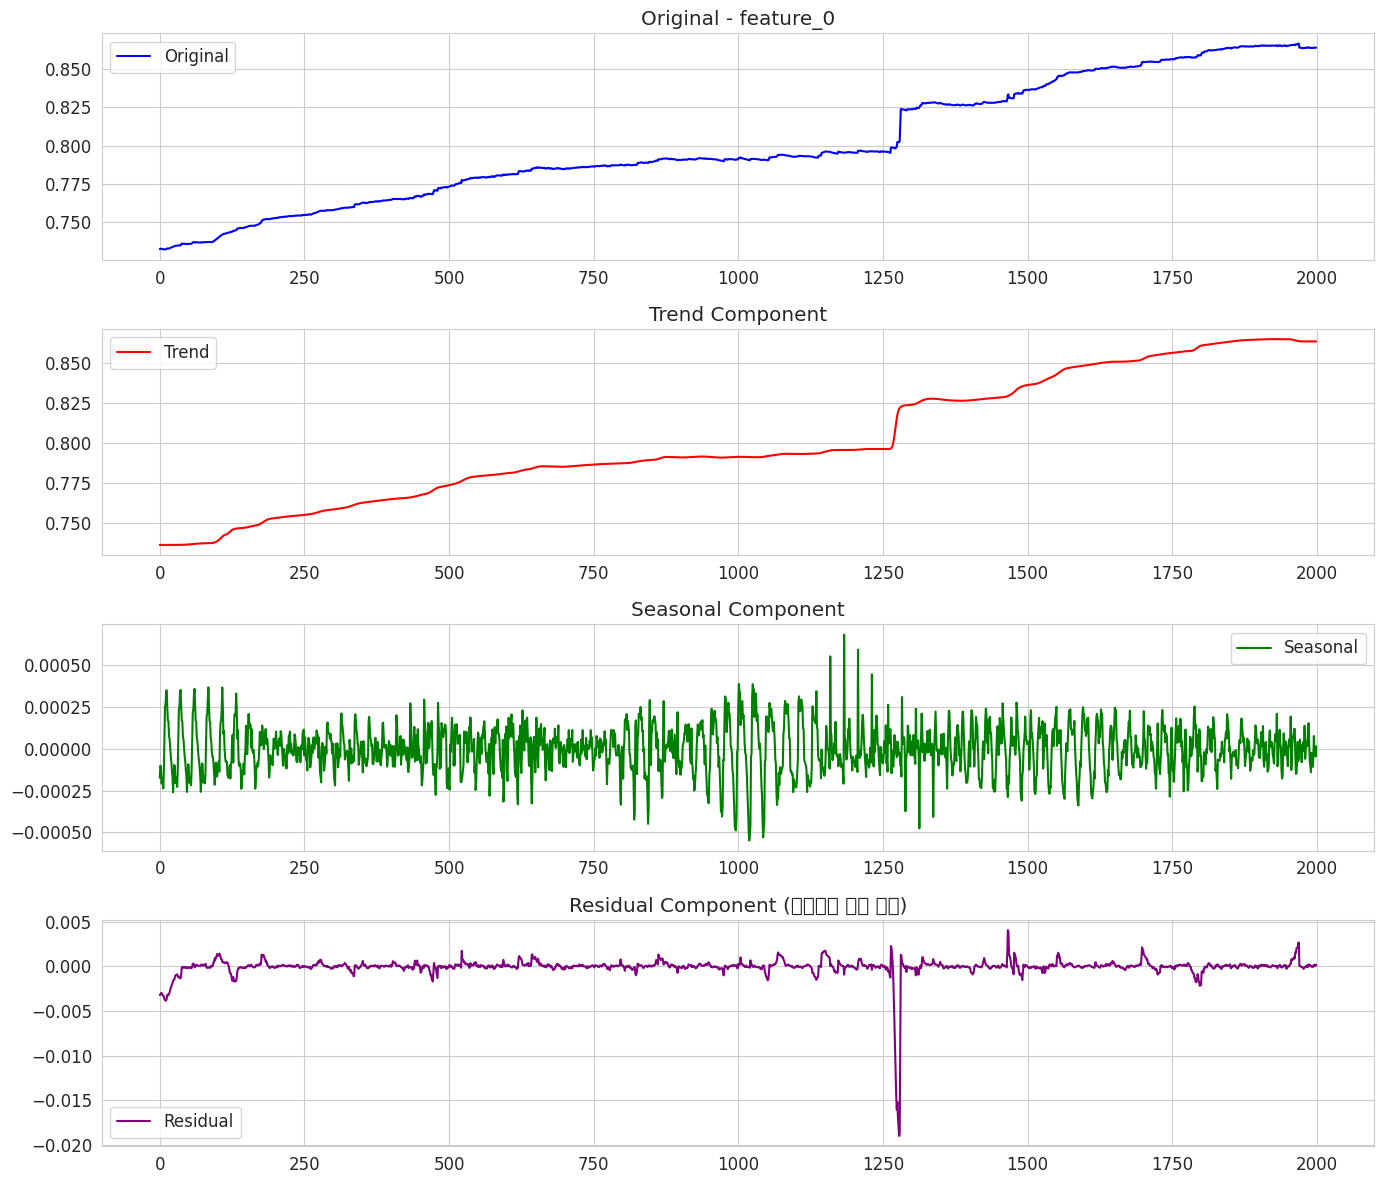


분산 비율:
  Trend: 98.85%
  Seasonal: 0.19%
  Residual: 1.26%


In [13]:
# PSM 데이터 STL 분해 (첫 번째 feature)
col = psm_train.columns[0]
decomp_result = psm_analyzer.decompose(col, period=24)

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# 원본 데이터 (처음 2000개)
n_points = 2000
axes[0].plot(decomp_result['original'][:n_points], label='Original', color='blue')
axes[0].set_title(f'Original - {col}')
axes[0].legend()

# Trend
axes[1].plot(decomp_result['trend'][:n_points], label='Trend', color='red')
axes[1].set_title('Trend Component')
axes[1].legend()

# Seasonal
axes[2].plot(decomp_result['seasonal'][:n_points], label='Seasonal', color='green')
axes[2].set_title('Seasonal Component')
axes[2].legend()

# Residual
axes[3].plot(decomp_result['residual'][:n_points], label='Residual', color='purple')
axes[3].set_title('Residual Component (이상치가 여기 포함)')
axes[3].legend()

plt.tight_layout()
plt.show()

print(f"\n분산 비율:")
print(f"  Trend: {decomp_result['trend_var_ratio']*100:.2f}%")
print(f"  Seasonal: {decomp_result['seasonal_var_ratio']*100:.2f}%")
print(f"  Residual: {decomp_result['residual_var_ratio']*100:.2f}%")

## 5. 이상치 분포 분석

In [14]:
# PSM 이상치 분포 분석
psm_test_analyzer = DataAnalyzer(psm_test)
psm_anomaly_dist = psm_test_analyzer.anomaly_distribution(psm_labels)

print("=" * 50)
print("PSM 이상치 분포 분석")
print("=" * 50)
print(f"전체 샘플 수: {psm_anomaly_dist['total_samples']:,}")
print(f"이상치 수: {psm_anomaly_dist['anomaly_count']:,}")
print(f"정상 수: {psm_anomaly_dist['normal_count']:,}")
print(f"이상치 비율: {psm_anomaly_dist['anomaly_ratio']:.2f}%")
print(f"이상치 구간 수: {psm_anomaly_dist['num_anomaly_segments']}")
print(f"평균 구간 길이: {psm_anomaly_dist['avg_segment_length']:.1f}")
print(f"최대 구간 길이: {psm_anomaly_dist['max_segment_length']}")
print(f"최소 구간 길이: {psm_anomaly_dist['min_segment_length']}")

PSM 이상치 분포 분석
전체 샘플 수: 87,841
이상치 수: 24,381
정상 수: 63,460
이상치 비율: 27.76%
이상치 구간 수: 72
평균 구간 길이: 338.6
최대 구간 길이: 8861
최소 구간 길이: 1


In [15]:
# SWaT 이상치 분포 분석
swat_test_analyzer = DataAnalyzer(swat_test)
swat_anomaly_dist = swat_test_analyzer.anomaly_distribution(swat_labels)

print("=" * 50)
print("SWaT 이상치 분포 분석")
print("=" * 50)
print(f"전체 샘플 수: {swat_anomaly_dist['total_samples']:,}")
print(f"이상치 수: {swat_anomaly_dist['anomaly_count']:,}")
print(f"정상 수: {swat_anomaly_dist['normal_count']:,}")
print(f"이상치 비율: {swat_anomaly_dist['anomaly_ratio']:.2f}%")
print(f"이상치 구간 수: {swat_anomaly_dist['num_anomaly_segments']}")
print(f"평균 구간 길이: {swat_anomaly_dist['avg_segment_length']:.1f}")

SWaT 이상치 분포 분석
전체 샘플 수: 449,919
이상치 수: 54,621
정상 수: 395,298
이상치 비율: 12.14%
이상치 구간 수: 35
평균 구간 길이: 1560.6


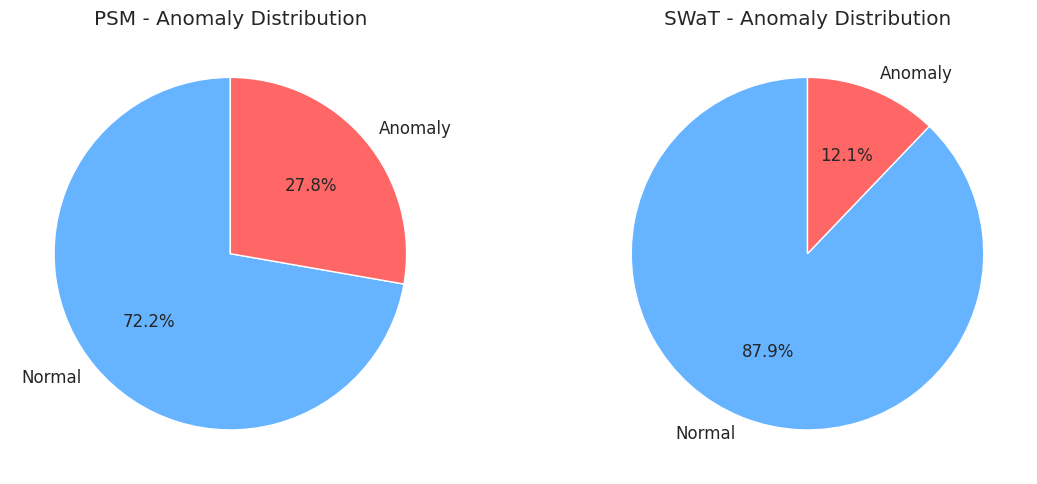

In [16]:
# 이상치 분포 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PSM
labels_pie = ['Normal', 'Anomaly']
sizes_psm = [psm_anomaly_dist['normal_count'], psm_anomaly_dist['anomaly_count']]
colors = ['#66b3ff', '#ff6666']
axes[0].pie(sizes_psm, labels=labels_pie, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('PSM - Anomaly Distribution')

# SWaT
sizes_swat = [swat_anomaly_dist['normal_count'], swat_anomaly_dist['anomaly_count']]
axes[1].pie(sizes_swat, labels=labels_pie, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('SWaT - Anomaly Distribution')

plt.tight_layout()
plt.show()

## 6. 상관관계 분석

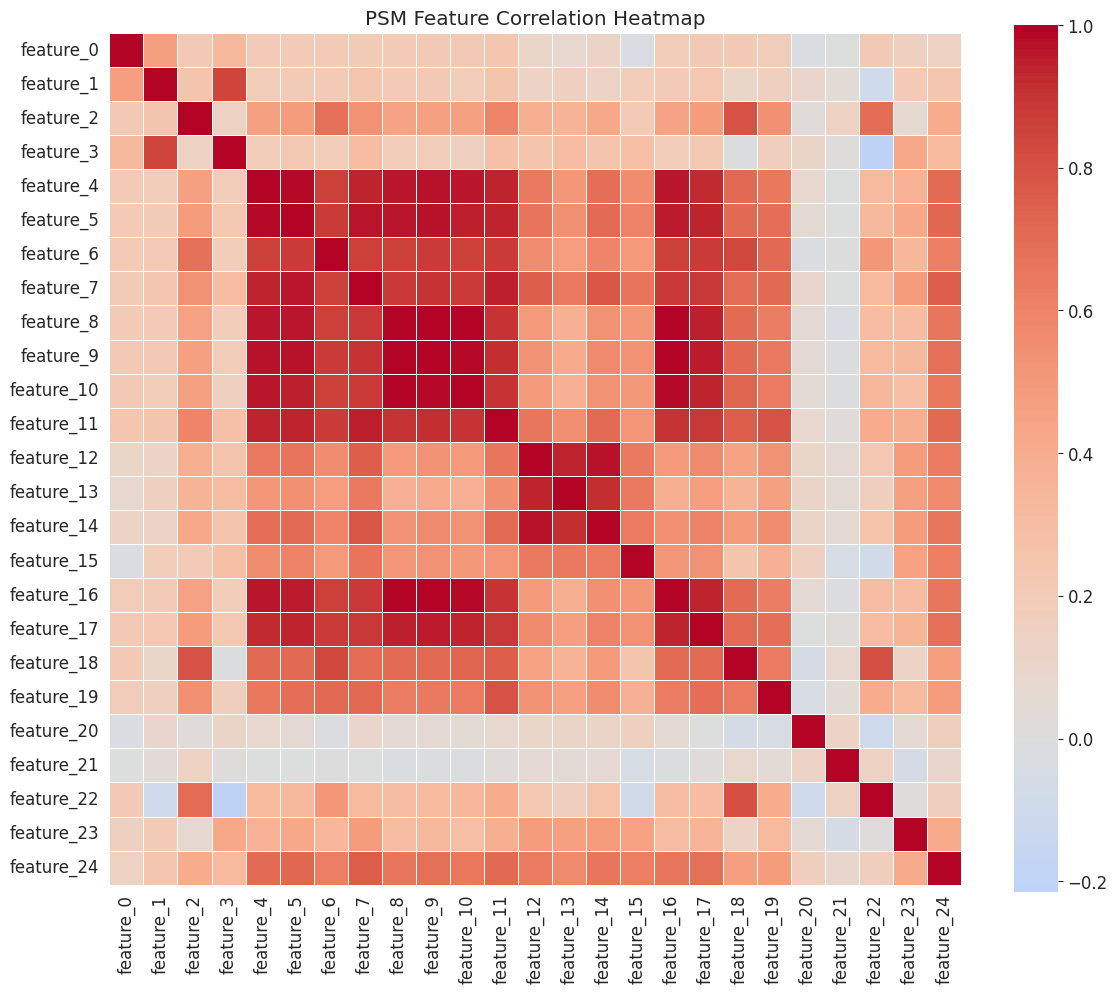

In [17]:
# PSM 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr_matrix = psm_analyzer.correlation_analysis()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('PSM Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

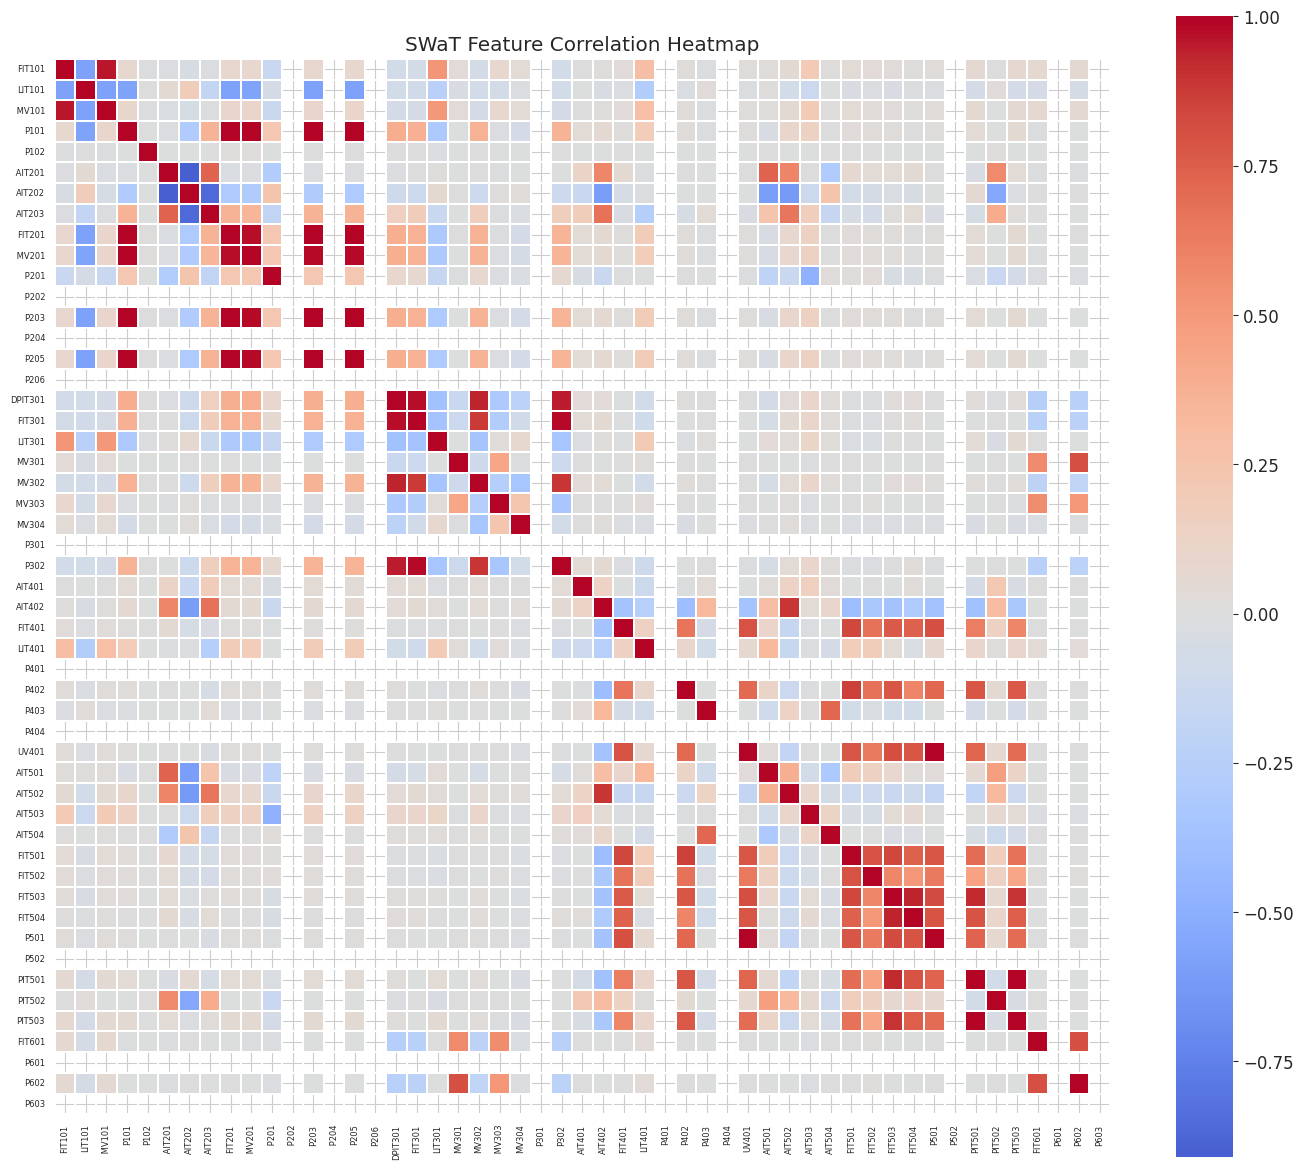

In [18]:
# SWaT 상관관계 히트맵
plt.figure(figsize=(14, 12))
swat_corr_matrix = swat_analyzer.correlation_analysis()
sns.heatmap(swat_corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.3,
            xticklabels=True, yticklabels=True)
plt.title('SWaT Feature Correlation Heatmap')
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

## 7. 결과 요약

In [19]:
print("=" * 60)
print("EDA 결과 요약")
print("=" * 60)

print("\n[데이터셋 비교]")
print(f"{'항목':<20} {'PSM':<20} {'SWaT':<20}")
print("-" * 60)
print(f"{'Train 샘플 수':<20} {psm_info['train_shape'][0]:<20,} {swat_info['train_shape'][0]:<20,}")
print(f"{'Test 샘플 수':<20} {psm_info['test_shape'][0]:<20,} {swat_info['test_shape'][0]:<20,}")
print(f"{'Feature 수':<20} {psm_info['num_features']:<20} {swat_info['num_features']:<20}")
print(f"{'이상치 비율':<20} {psm_info['anomaly_ratio']:<20.2f}% {swat_info['anomaly_ratio']:<20.2f}%")
print(f"{'이상치 구간 수':<20} {psm_anomaly_dist['num_anomaly_segments']:<20} {swat_anomaly_dist['num_anomaly_segments']:<20}")

print("\n[정상성 검정 요약]")
print(f"{'항목':<25} {'PSM':<20} {'SWaT':<20}")
print("-" * 65)
print(f"{'검정한 feature 수':<25} {n_total:<20} {swat_n_total:<20}")
print(f"{'ADF 기준 정상':<25} {n_stationary_adf}/{n_total} ({n_stationary_adf/n_total*100:.1f}%){'':5} {swat_n_stationary_adf}/{swat_n_total} ({swat_n_stationary_adf/swat_n_total*100:.1f}%)")
print(f"{'KPSS 기준 정상':<25} {n_stationary_kpss}/{n_total} ({n_stationary_kpss/n_total*100:.1f}%){'':5} {swat_n_stationary_kpss}/{swat_n_total} ({swat_n_stationary_kpss/swat_n_total*100:.1f}%)")
print(f"{'두 검정 모두 정상':<25} {n_stationary_both}/{n_total} ({n_stationary_both/n_total*100:.1f}%){'':5} {swat_n_stationary_both}/{swat_n_total} ({swat_n_stationary_both/swat_n_total*100:.1f}%)")

print("\n[주요 발견]")
print(f"1. PSM: {psm_info['num_features']}개 feature, 이상치 비율 {psm_info['anomaly_ratio']:.2f}%")
print(f"2. SWaT: {swat_info['num_features']}개 feature, 이상치 비율 {swat_info['anomaly_ratio']:.2f}%")
print(f"3. PSM 정상성: ADF {n_stationary_adf/n_total*100:.1f}%, KPSS {n_stationary_kpss/n_total*100:.1f}%")
print(f"4. SWaT 정상성: ADF {swat_n_stationary_adf/swat_n_total*100:.1f}%, KPSS {swat_n_stationary_kpss/swat_n_total*100:.1f}%")
print(f"5. 평균 이상치 구간 길이 - PSM: {psm_anomaly_dist['avg_segment_length']:.1f}, SWaT: {swat_anomaly_dist['avg_segment_length']:.1f}")
print("6. 연속적인 이상치 구간 존재 → Point Adjustment 평가 방법 필요")

# 정상성 해석
print("\n[정상성 검정 해석]")
if n_stationary_both / n_total > 0.5:
    print(f"  PSM: 대부분의 feature가 정상 시계열 → 기본 모델 적용 가능")
else:
    print(f"  PSM: 비정상 시계열 다수 → RevIN/차분 등 전처리 고려 필요")
    
if swat_n_stationary_both / swat_n_total > 0.5:
    print(f"  SWaT: 대부분의 feature가 정상 시계열 → 기본 모델 적용 가능")
else:
    print(f"  SWaT: 비정상 시계열 다수 → RevIN/차분 등 전처리 고려 필요")

EDA 결과 요약

[데이터셋 비교]
항목                   PSM                  SWaT                
------------------------------------------------------------
Train 샘플 수           132,481              395,298             
Test 샘플 수            87,841               449,919             
Feature 수            25                   51                  
이상치 비율               27.76               % 12.14               %
이상치 구간 수             72                   35                  

[정상성 검정 요약]
항목                        PSM                  SWaT                
-----------------------------------------------------------------
검정한 feature 수             25                   51                  
ADF 기준 정상                 25/25 (100.0%)      50/51 (98.0%)
KPSS 기준 정상                0/25 (0.0%)      32/51 (62.7%)
두 검정 모두 정상                0/25 (0.0%)      23/51 (45.1%)

[주요 발견]
1. PSM: 25개 feature, 이상치 비율 27.76%
2. SWaT: 51개 feature, 이상치 비율 12.14%
3. PSM 정상성: ADF 100.0%, KPSS 0.0%
4. SWaT 정상성: ADF 98.0%, KPSS 62.7%


In [20]:
# 결과 저장
import json

eda_results = {
    'PSM': {
        'train_shape': list(psm_info['train_shape']),
        'test_shape': list(psm_info['test_shape']),
        'num_features': psm_info['num_features'],
        'anomaly_ratio': psm_info['anomaly_ratio'],
        'anomaly_segments': psm_anomaly_dist['num_anomaly_segments'],
    },
    'SWaT': {
        'train_shape': list(swat_info['train_shape']),
        'test_shape': list(swat_info['test_shape']),
        'num_features': swat_info['num_features'],
        'anomaly_ratio': swat_info['anomaly_ratio'],
        'anomaly_segments': swat_anomaly_dist['num_anomaly_segments'],
    }
}

# outputs 디렉토리에 저장
output_path = os.path.join(project_root, 'outputs', 'logs', 'eda_results.json')
os.makedirs(os.path.dirname(output_path), exist_ok=True)
with open(output_path, 'w') as f:
    json.dump(eda_results, f, indent=2)
print(f"\nEDA 결과가 저장되었습니다: {output_path}")


EDA 결과가 저장되었습니다: /home/sheda7788/project/Anomaly-Detection/outputs/logs/eda_results.json
